jupyter:
  jupytext:
    text_representation:
      extension: .py
      format_name: light
      format_version: '1.5'
      jupytext_version: 1.13.6
  kernelspec:
    display_name: Python 3 (ipykernel)
    language: python
    name: python3

# CA housing lux visualization 

## Setup libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [5]:
from lightgbm import LGBMRegressor

In [6]:
import matplotlib.pyplot as plt

In [7]:
import lux

## Get data

In [8]:
california_housing = fetch_california_housing(as_frame=True)

## Data summary

In [9]:
housing_raw = california_housing.frame

In [10]:
housing_raw.shape

(20640, 9)

List missing values

In [11]:
housing_raw.isna().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

## Get training and test data

In [12]:
housing_df, housing_unseen = train_test_split(
    housing_raw, test_size=0.2, random_state=42, shuffle=True
)

In [13]:
y_train = housing_df.MedHouseVal
X_train = housing_df.drop(columns=['MedHouseVal'])

## Gradient boosting regression

In [14]:
best_param = {
    "num_leaves": 31,
    "n_estimators": 400,
    "learning_rate": 0.1,
}

In [15]:
gbm_best = LGBMRegressor(**best_param)

In [16]:
gbm_best.fit(X_train, y_train)

LGBMRegressor(n_estimators=400)

In [17]:
y_test = housing_unseen.MedHouseVal
X_test = housing_unseen.drop(columns='MedHouseVal')

In [18]:
y_pred = gbm_best.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R2 {:.3f}".format(r2))

R2 0.854


## Feature importances

In [19]:
feature_importance = pd.DataFrame({
    'feature': gbm_best.feature_name_,
    'importance': gbm_best.feature_importances_
}).sort_values(by='importance', ascending=False)

<AxesSubplot:xlabel='importance', ylabel='feature'>

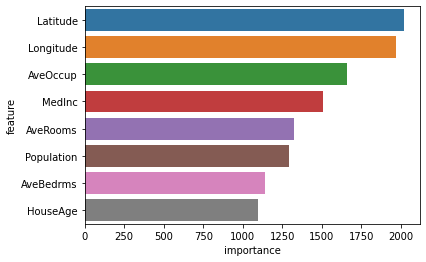

In [20]:
sns.barplot(x='importance', y='feature', data=feature_importance)

In [35]:
from sklearn.inspection import permutation_importance

In [36]:
y_data = housing_raw.MedHouseVal
X_data = housing_raw.drop(columns=['MedHouseVal'])

In [37]:
p_importance = permutation_importance(
    gbm_best, X_data, y_data, n_repeats=10, random_state=0)

In [41]:
p_importance_df = pd.DataFrame({
    'feature': X_data.columns,
    'importance': p_importance.importances_mean
}).sort_values(by='importance', ascending=False)

<AxesSubplot:xlabel='importance', ylabel='feature'>

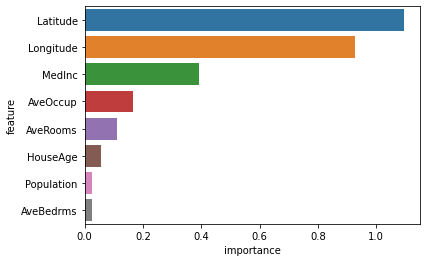

In [42]:
sns.barplot(x='importance', y='feature', data=p_importance_df)

## Lux visualizations

In [21]:
from lux.vis.Vis import Vis

In [22]:
from lux.vis.VisList import VisList

In [23]:
df = housing_raw

In [24]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [25]:
df.MedHouseVal

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [26]:
df.intent = [df.columns.tolist()]
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [32]:
VisList([housing_raw.columns.tolist()], df)

LuxWidget(recommendations=[{'action': 'Vis List', 'description': 'Shows a vis list defined by the intent', 'vs…

In [28]:
df.intent = ['MedHouseVal']
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [33]:
Vis(['MedHouseVal', lux.Clause('MedInc')], df)

LuxWidget(current_vis={'config': {'view': {'continuousWidth': 400, 'continuousHeight': 300}, 'axis': {'labelCo…

In [34]:
VisList([['AveRooms', 'AveBedrms', 'AveOccup']], df)

LuxWidget(recommendations=[{'action': 'Vis List', 'description': 'Shows a vis list defined by the intent', 'vs…